In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# Loading the data

In [2]:
# Read the data
df = pd.read_csv('C:/Users/vabalagon/Desktop/Machine Learning Projects/Applied-Machine-Learning-Projects/Customer Churn Prediction/data/processed.csv')

# Get the features and target variable from the dataframe
X = df.drop(['state', 'area_code', 'churn'], axis=1).to_numpy()
y = df['churn'].to_numpy()

# Split into training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, 
                                                    test_size = 0.25, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y)

##### Function for printing the metric scores

In [3]:
def classifier_scores(clf_name, clf, X_train, X_test, y_train, y_test):
    clf_acc_train = accuracy_score(y_train, clf.predict(X_train))
    clf_bacc_train = balanced_accuracy_score(y_train, clf.predict(X_train))
    clf_precision_train = precision_score(y_train, clf.predict(X_train))
    clf_recall_train = recall_score(y_train, clf.predict(X_train))
    clf_f1_train = f1_score(y_train, clf.predict(X_train))
    clf_auc_train = roc_auc_score(y_train, clf.predict(X_train))

    clf_acc_test = accuracy_score(y_test, clf.predict(X_test))
    clf_bacc_test = balanced_accuracy_score(y_test, clf.predict(X_test))
    clf_precision_test = precision_score(y_test, clf.predict(X_test))
    clf_recall_test = recall_score(y_test, clf.predict(X_test))
    clf_f1_test = f1_score(y_test, clf.predict(X_test))
    clf_auc_test = roc_auc_score(y_test, clf.predict(X_test))

    scores = {'inds':['{} Train'.format(clf_name), '{} Test'.format(clf_name)], 
              "Accuracy":[clf_acc_train, clf_acc_test], 
              "bAccuracy":[clf_bacc_train, clf_bacc_test],
              "Precision":[clf_precision_train, clf_precision_test],
              "Recall":[clf_recall_train, clf_recall_test],
              "f1":[clf_f1_train, clf_f1_test],
              "AUC":[clf_auc_train, clf_auc_test]}

    scores_df = pd.DataFrame(scores, columns=['Accuracy', "bAccuracy", "Precision", "Recall", "f1", "AUC"], index=scores['inds'])
    return scores_df

##### Accuracy score per class

In [4]:
def accuracy_per_class(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    for y_i in np.unique(y_test)[::-1]:
        print()

        # Find the indices of y_i in the true labels
        indices_i = np.where(y_test == y_i)

        # Computes the accuracy
        print('class', y_i, 'Accuracy: ', str(round(np.sum(y_test[indices_i] == y_pred[indices_i])/ len(np.where(y_test==y_i)[0]), 3)))

##### Plot confusion matrix

In [5]:
def plt_confusion_matrix(clf, X_test, y_test):
    cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=clf.classes_)
    disp.plot()

# Logistic Regression with 3-deg polynomial features

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

,Accuracy,bAccuracy,Precision,Recall,f1,AUC
LogReg 3-Deg Poly Train,0.927518,0.912089,0.686747,0.890625,0.77551,0.912089
LogReg 3-Deg Poly Test,0.904045,0.857784,0.626316,0.793333,0.70000,0.857784



class 1 Accuracy:  0.793

class 0 Accuracy:  0.922


<IPython.core.display.Javascript object>


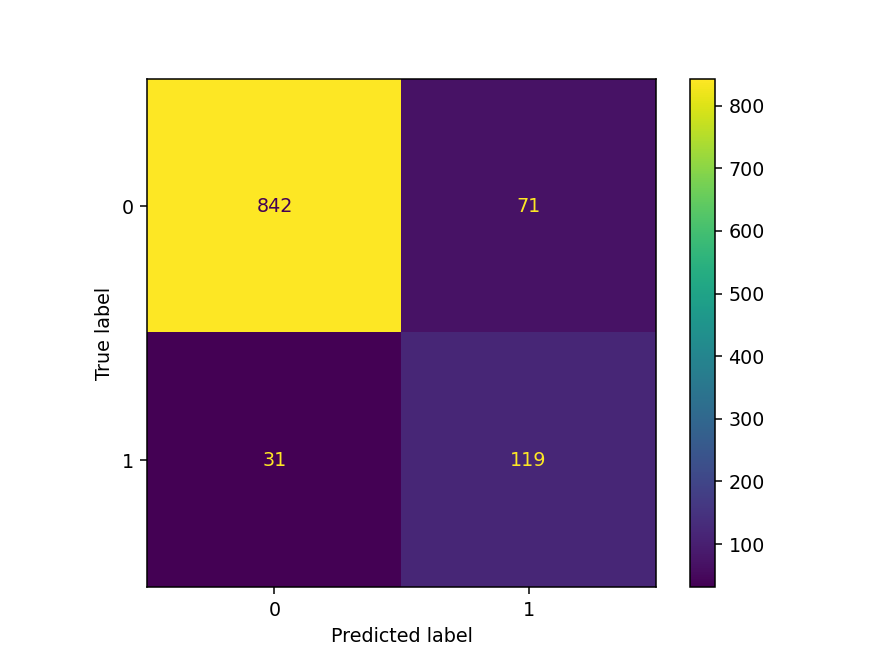

In [7]:
# Polynomial features generator
poly = PolynomialFeatures(degree=3)

# Apply standard scaler to the data with polynomial features
scaler = StandardScaler()

# Logistic regression
lr = LogisticRegression(C=30,
                         penalty="l2", 
                         max_iter=10000, 
                         class_weight='balanced')

# We use the pipline method to make the code compact
logreg_poly_clf = Pipeline([('polynomial_features',poly),
                             ('standard_scaler', scaler),
                             ('logistic_regression',lr)])
logreg_poly_clf.fit(X_train, y_train)

# Display the metric scores
logreg_poly_scores = classifier_scores("LogReg 3-Deg Poly", logreg_poly_clf, X_train, X_test, y_train, y_test)
display(logreg_poly_scores)

# Display the accuracy of the classifier for each class
accuracy_per_class(logreg_poly_clf, X_test, y_test)

# Plots the confusion matrix
plt_confusion_matrix(logreg_poly_clf, X_test, y_test)

# Decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

,Accuracy,bAccuracy,Precision,Recall,f1,AUC
Decision Tree Train,0.972388,0.930725,0.926540,0.872768,0.898851,0.930725
Decision Tree Test,0.959548,0.912380,0.863946,0.846667,0.855219,0.912380



class 1 Accuracy:  0.847

class 0 Accuracy:  0.978


<IPython.core.display.Javascript object>


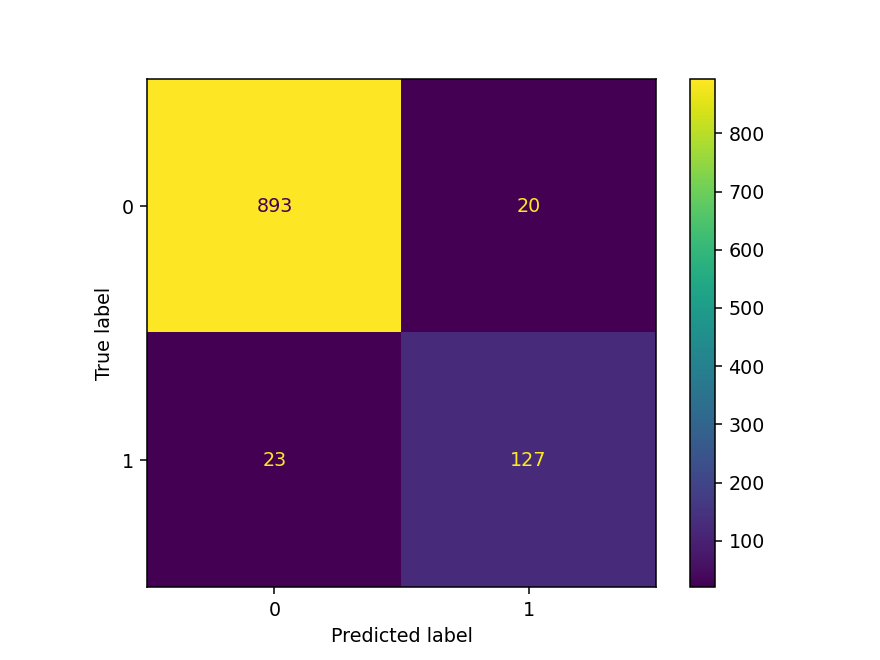

In [9]:
decision_tree_clf = DecisionTreeClassifier(criterion='entropy', 
                                               max_depth=7, 
                                               splitter="best", 
                                               random_state=42,
                                               min_samples_leaf=5, 
                                               class_weight='balanced')
decision_tree_clf.fit(X_train, y_train)

# Display the metric scores
decision_tree_scores = classifier_scores("Decision Tree", decision_tree_clf, X_train, X_test, y_train, y_test)
display(decision_tree_scores)

# Display the accuracy of the classifier for each class
accuracy_per_class(decision_tree_clf, X_test, y_test)

# Plots the confusion matrix
plt_confusion_matrix(decision_tree_clf, X_test, y_test)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

,Accuracy,bAccuracy,Precision,Recall,f1,AUC
Random Forest Train,0.975839,0.933666,0.949153,0.875000,0.910569,0.933666
Random Forest Test,0.971778,0.922286,0.941176,0.853333,0.895105,0.922286



class 1 Accuracy:  0.853

class 0 Accuracy:  0.991


<IPython.core.display.Javascript object>


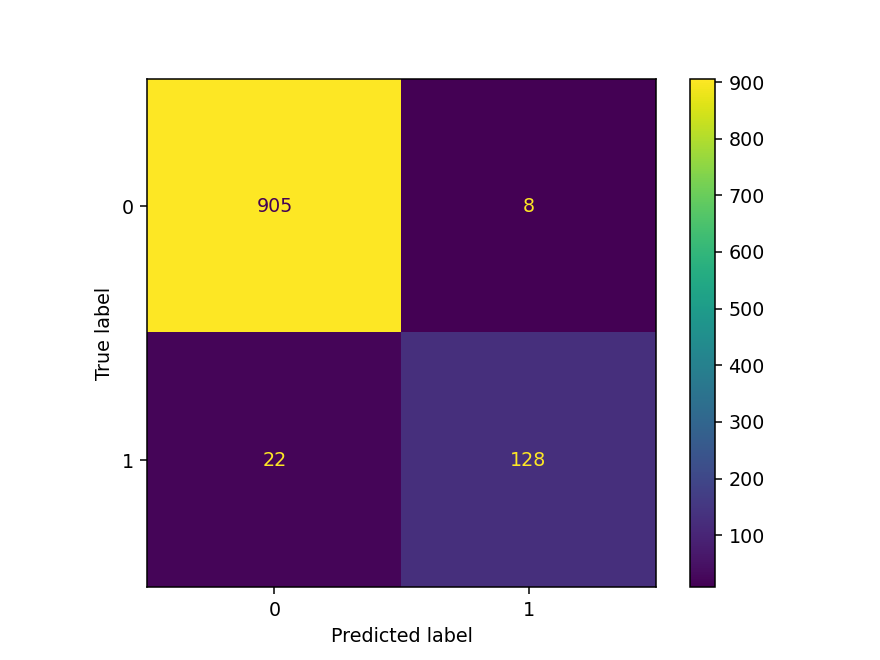

In [11]:
random_forest_clf = RandomForestClassifier(n_estimators= 300,
                                            min_samples_split= 2,
                                            min_samples_leaf= 1,
                                            max_features= "sqrt",
                                            max_depth= 5,
                                            bootstrap= False,
                                            class_weight="balanced_subsample")

random_forest_clf.fit(X_train, y_train)

# Display the metric scores
random_forest_scores = classifier_scores("Random Forest", random_forest_clf, X_train, X_test, y_train, y_test)
display(random_forest_scores)

# Display the accuracy of the classifier for each class
accuracy_per_class(random_forest_clf, X_test, y_test)

# Plots the confusion matrix
plt_confusion_matrix(random_forest_clf, X_test, y_test)

# XGBoost

In [12]:
import xgboost as xgb
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
                                                    class_weight='balanced',
                                                    y=y_train
                                                    )

C:\Users\vabalagon\.conda\envs\DataScienceStandard\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


C:\Users\vabalagon\.conda\envs\DataScienceStandard\lib\site-packages\xgboost\core.py:499: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


,Accuracy,bAccuracy,Precision,Recall,f1,AUC
XGBoost Train,0.979605,0.946126,0.952719,0.899554,0.925373,0.946126
XGBoost Test,0.970837,0.918952,0.940741,0.846667,0.891228,0.918952



class 1 Accuracy:  0.847

class 0 Accuracy:  0.991


<IPython.core.display.Javascript object>


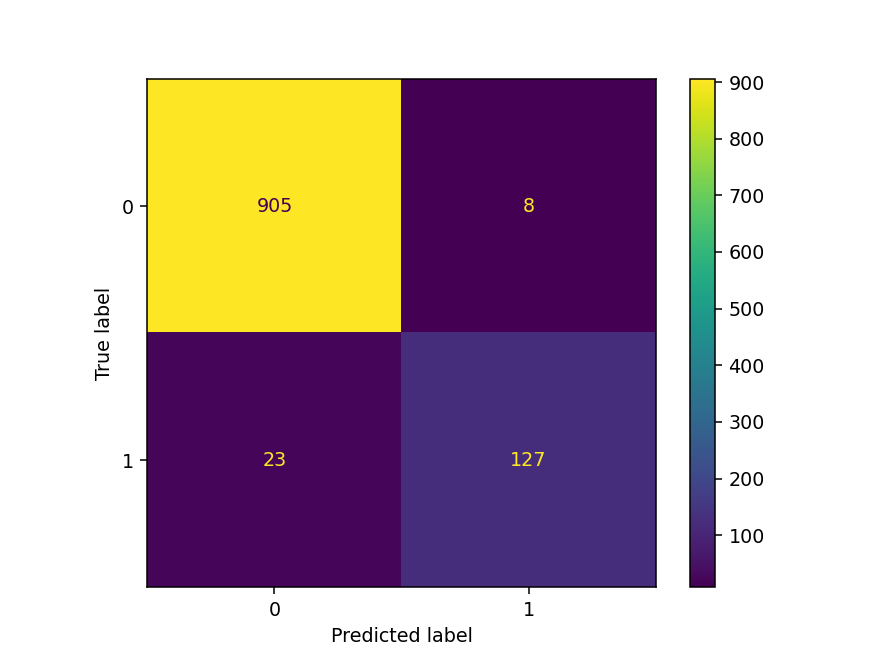

In [13]:
xgboost_clf = xgb.XGBClassifier(eval_metric='logloss',
                                objective="binary:logistic",
                                use_label_encoder=False,
                                n_estimators=300,
                                max_depth=4,
                                min_child_weight=4,
                                subsample=.8,
                                colsample_bytree=.8,
                                reg_lambda=12, #[0-20]
                                reg_alpha=5,
                                gamma=.45, #.45,
                                seed=42,
                                learning_rate=0.1,
                                scale_pos_weight=.85)

xgboost_clf.fit(X_train, y_train, classes_weights)

# Display the metric scores
xgboost_scores = classifier_scores("XGBoost", xgboost_clf, X_train, X_test, y_train, y_test)
display(xgboost_scores)

# Display the accuracy of the classifier for each class
accuracy_per_class(xgboost_clf, X_test, y_test)

# Plots the confusion matrix
plt_confusion_matrix(xgboost_clf, X_test, y_test)

##### Display all scores together

In [14]:
display(pd.concat([logreg_poly_scores, decision_tree_scores, random_forest_scores, xgboost_scores], axis=0))

,Accuracy,bAccuracy,Precision,Recall,f1,AUC
LogReg 3-Deg Poly Train,0.927518,0.912089,0.686747,0.890625,0.775510,0.912089
LogReg 3-Deg Poly Test,0.904045,0.857784,0.626316,0.793333,0.700000,0.857784
Decision Tree Train,0.972388,0.930725,0.926540,0.872768,0.898851,0.930725
Decision Tree Test,0.959548,0.912380,0.863946,0.846667,0.855219,0.912380
Random Forest Train,0.975839,0.933666,0.949153,0.875000,0.910569,0.933666
Random Forest Test,0.971778,0.922286,0.941176,0.853333,0.895105,0.922286
XGBoost Train,0.979605,0.946126,0.952719,0.899554,0.925373,0.946126
XGBoost Test,0.970837,0.918952,0.940741,0.846667,0.891228,0.918952


We choose the final model based on these scores. Alternatively, we can use these models to form an ensemble classifier.

# Ensemble Classifier

Let's only use the Decision Tree, Random Forest, and XGBoost models.

In [15]:
from sklearn.ensemble import VotingClassifier

,Accuracy,bAccuracy,Precision,Recall,f1,AUC
Ensemble Train,0.978663,0.931575,0.979798,0.866071,0.919431,0.931575
Ensemble Test,0.973659,0.920595,0.962121,0.846667,0.900709,0.920595



class 1 Accuracy:  0.847

class 0 Accuracy:  0.995


<IPython.core.display.Javascript object>


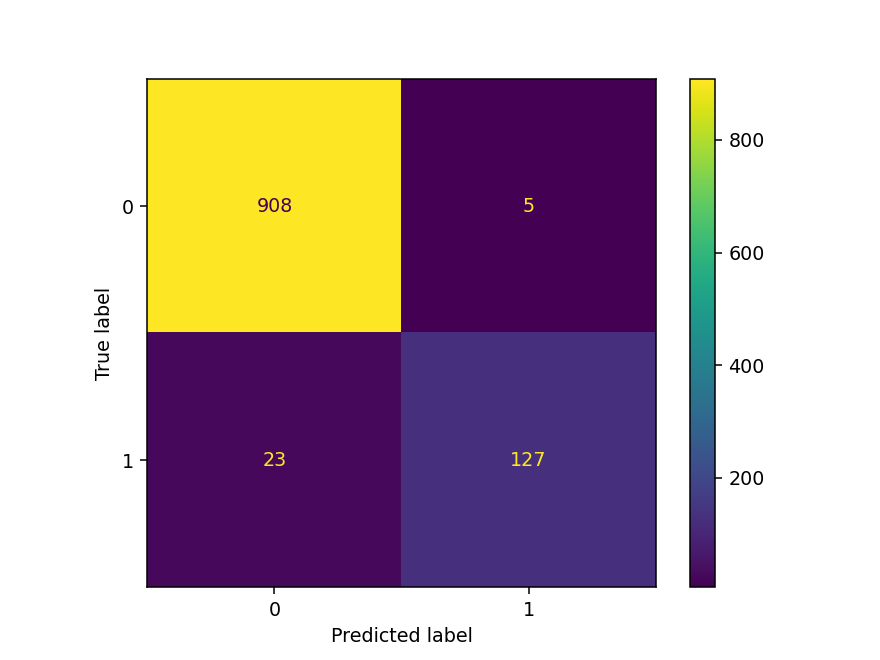

In [16]:
# We use the models we trained earlier to form an ensemble classifier
estimators = [('LogReg', logreg_poly_clf),
              ("Decision Tree", decision_tree_clf), 
             ("Random Forest", random_forest_clf), 
             ('XGBoost', xgboost_clf)]

# We use a hard voting classifier 
ensemble_clf = VotingClassifier(estimators=estimators, voting='hard')
ensemble_clf.fit(X_train, y_train)

# Display the metric scores
ensemble_clf_scores = classifier_scores("Ensemble", ensemble_clf, X_train, X_test, y_train, y_test)
display(ensemble_clf_scores)

# Display the accuracy of the classifier for each class
accuracy_per_class(ensemble_clf, X_test, y_test)

# Plots the confusion matrix
plt_confusion_matrix(ensemble_clf, X_test, y_test)

Bests the random forest classifier by a very small percentage.

# We use the model to predict the test set

##### Reading and processing the test set

In [17]:
df_test = pd.read_csv("data/test.csv") # Test is treated as "real world" data, has no labels
df_test.replace({'yes': 1, 'no': 0}, inplace=True)
df_test['total_net_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
df_test['total_net_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
df_test['total_net_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']
df_test.drop(["total_day_minutes", "total_eve_minutes", "total_night_minutes",
        'total_day_calls', 'total_eve_calls', 'total_night_calls',
        'total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True, axis=1)

df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,KS,128,area_code_415,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,AL,118,area_code_510,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,IA,62,area_code_415,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,VT,93,area_code_510,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,NE,174,area_code_415,0,0,0,15.5,5,4.19,3,652.1,303,55.96


##### This serves as the new data that the model has not seen yet

In [18]:
X_test_final = df_test.drop(['id', 'state', 'area_code'], axis=1).to_numpy()

#### Final model

In [19]:
# We simply train the voting classifier with the entire dataset (no train-test split)
clf_final = VotingClassifier(estimators=estimators, voting='hard')
clf_final.fit(X, y)

clf_acc = accuracy_score(y, clf_final.predict(X))
clf_bacc = balanced_accuracy_score(y, clf_final.predict(X))
clf_precision = precision_score(y, clf_final.predict(X))
clf_recall = recall_score(y, clf_final.predict(X))
clf_f1 = f1_score(y, clf_final.predict(X))
clf_auc = roc_auc_score(y, clf_final.predict(X))

print('Accuracy: ', clf_acc)
print('Balanced Accuracy: ', clf_bacc)
print('Precision: ', clf_precision)
print('Recall: ', clf_recall)
print('f1: ', clf_f1)
print('AUC: ', clf_auc)

Accuracy:  0.9781176470588235
Balanced Accuracy:  0.9299321029939154
Precision:  0.9791271347248577
Recall:  0.862876254180602
f1:  0.9173333333333333
AUC:  0.9299321029939154


##### Make predictions on new data

In [20]:
pred_final = clf_final.predict(X_test_final)
pred_final

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Output

In [21]:
df_output = pd.DataFrame(np.vstack((df_test['id'].values, pred_final)).T)
df_output.columns = ['id', 'churn']
df_output['churn'].replace({1:'yes', 0:'no'}, inplace=True)
df_output

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


##### Export the submission to csv

In [22]:
df_output.to_csv("data/submission.csv", index=False)